# Final Project

## Coding Portion

Here I have retained many of same sections included in the written portion of the project just to explain portions of the code and to help structure portions of the written part.

In [1]:
# Imports
import warnings

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import neighbors
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import csv

Here I have set up each of the classifiers and cross validations, as well as some frequently used functions. 

In [2]:
# Functions and initialization of classifiers

# Create k-NN classifier.
estimator_knn = neighbors.KNeighborsClassifier()

# Create decision tree classifier.
estimator_dt = tree.DecisionTreeClassifier()

# Create a grid searcher with cross-validation. knn
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid_knn = {'n_neighbors': k_list}
grid_search_knn = GridSearchCV(estimator_knn, param_grid_knn, cv=10)

# Create a grid searcher with cross-validation. dt
d_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid_dt = {'max_depth': d_list}
grid_search_dt = GridSearchCV(estimator_dt, param_grid_dt, cv=10)

#Logistic Regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', max_iter=30000)

# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    return 1 - accuracy_score(Y, Y_pred)

# Drat heatmaps for cross validation
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='k')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

### Dataset Pre-processing

For each of the datasets I chose to use from the UCI database I have set them up as data frames so they could easily be displayed and manipulated for the purposes of the experimental setup. 

#### Wines Dataset **(A)**

For the first dataset I chose a multi-class dataset with chemical measurements of 3 different classes of wine (<https://archive.ics.uci.edu/ml/datasets/Wine>). It's a smaller dataset with only continuous numerical values, so it should be easy to work with. The classes in this dataset are also very well defined. 

In [3]:
# wines df (A)
dfA = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                      names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                               'Magnesium', 'Total phenols', 'Flavanoids', 
                               'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                               'Hue', 'OD280/OD315 of diluted wines', 'Proline'], 
                      error_bad_lines = False)
print('Dataset A: {} datapoints x {} features'.format(dfA.shape[0], dfA.shape[1]))
dfA.head()

Dataset A: 178 datapoints x 13 features


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Student Performance Dataset **(B)**

For the second dataset I have a dataset of student demographics and performance scores from two different schools (<https://archive.ics.uci.edu/ml/datasets/Student+Performance>). There was no specified class for this dataset, so I chose which of the 2 schools as the class since it was the only attribute with a binary variable, and the classifiers should attempt to predict which of the schools the student attended based on the other variables. Here I have dropped the categorical data from the dataset I will end up using and keeping just the numerical values to make things easier.  

In [4]:
# data was in zip file so csv was downloaded to my computer. dataset link:
# https://archive.ics.uci.edu/ml/datasets/Student+Performance

# students df (B)
dfB = pd.read_csv('student-mat.csv', sep=';')

dfB['school'] = [1 if i=='GP' else -1 for i in dfB['school']]
dfB = dfB[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
    'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school']]
dfB = dfB.dropna()

print('Dataset B: {} datapoints x {} features'.format(dfB.shape[0], dfA.shape[1]-1))
dfB.head()

Dataset B: 395 datapoints x 12 features


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1


#### Census Dataset **(C)**

Lastly, for this dataset I've chosen a much larger dataset of US census information (<https://archive.ics.uci.edu/ml/datasets/Adult>) with the classification task of predicting whether the individual makes less than (`0`) or greater than (`1`) 50K a year, labeled under the `'income_ >50K'` column. Since most of the attributes are categorical I have one-hot encoded all of these columns. I then decided to drop all the columns with unknown categories (such as `'occupation_?'`), since I believed they wouldn't add any useful information; and columns for native countries other than the US just to reduce the number of features and training time. Displayed in the table below are just the numerical feature columns, and the income class column (`'income_>50K'`) the classifiers will be trained to predict.

In [5]:
# Census df (C)
dfC = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                         'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                          'native-country', 'income'])
dfC=dfC.dropna()
dfC = pd.get_dummies(dfC) # one-hot encode categorical attributes
# droping unknowns from categories because they are not useful
dfC = dfC.drop(columns=['workclass_ ?', 'occupation_ ?', 'native-country_ ?', 'income_ <=50K'])
# cuting off other native countries from columns besides US just to reduce # of columns
dfC = dfC.drop(dfC.columns[range(64, 102)], axis=1)
dfC = dfC.drop(dfC.columns[range(65,67)], axis=1)

if False: #used to reduce dataset size for testing code reducing runtime
    dfC = dfC[:300]

# showing just the numerical data columns and income here, all other categories are one-hot encoded
print('Dataset C: {} datapoints x {} features'.format(dfC.shape[0], dfC.shape[1]-1))
dfC[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_ >50K']].head()

Dataset C: 32561 datapoints x 65 features


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_ >50K
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


Here I have set up the dataframes in which I will display the results in. 

In [6]:
# Seting up dataframes and other variables used to display results at the end, one for each partition
dfs=[]
for i in range(3):
    dfs.append(pd.DataFrame(data={'A Training':['','',''], 'A Testing':['','',''],
                             'B Training':['','',''], 'B Testing':['','',''],
                             'C Training':['','',''], 'C Testing':['','',''], 
                             'Avg Testing':['','','']}) )
    dfs[i].index = ['Knn', 'Decision Tree', 'Logistic Regression']

# additional arrays to help track testing errors so I can average them
test_e_knn=np.zeros((3,9))
test_e_dt=np.zeros((3,9))
test_e_lr=np.zeros((3,9))

This is the main algorithm, here I convert the dataframes to numpy arrays then start by looping through each dataset. For each dataset (A, B, and C) it loops through each partition (20/80, 50/50, and 80/20), then for each partition through each trail (3x). Here I have printed out messages to show the progress, and some of the heatmaps displaying cross validation for the knn classifier. I am also using a similar method of cross-validation on the decision tree classifier. At the end each set of errors is averaged over each trial to be displayed in the dataframes.

Running dataset: 1
  Running partition: 1
    Trial 1: Training on 35 out of 178 datapoints
    Trial 2: Training on 35 out of 178 datapoints
    Trial 3: Training on 35 out of 178 datapoints
  Running partition: 2
    Trial 1: Training on 89 out of 178 datapoints
    Trial 2: Training on 89 out of 178 datapoints
    Trial 3: Training on 89 out of 178 datapoints
  Running partition: 3
    Trial 1: Training on 142 out of 178 datapoints
    Trial 2: Training on 142 out of 178 datapoints
    Trial 3: Training on 142 out of 178 datapoints
Running dataset: 2
  Running partition: 1
    Trial 1: Training on 79 out of 395 datapoints
    Trial 2: Training on 79 out of 395 datapoints
    Trial 3: Training on 79 out of 395 datapoints
  Running partition: 2
    Trial 1: Training on 197 out of 395 datapoints
    Trial 2: Training on 197 out of 395 datapoints
    Trial 3: Training on 197 out of 395 datapoints
  Running partition: 3
    Trial 1: Training on 316 out of 395 datapoints
    Trial 2: Trai

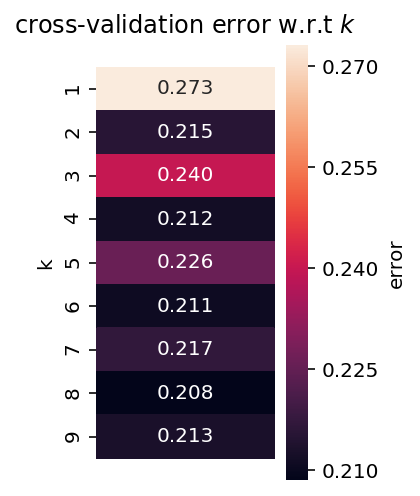

    Trial 2: Training on 26048 out of 32561 datapoints


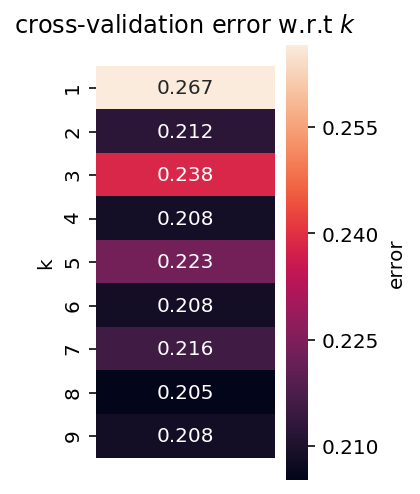

    Trial 3: Training on 26048 out of 32561 datapoints


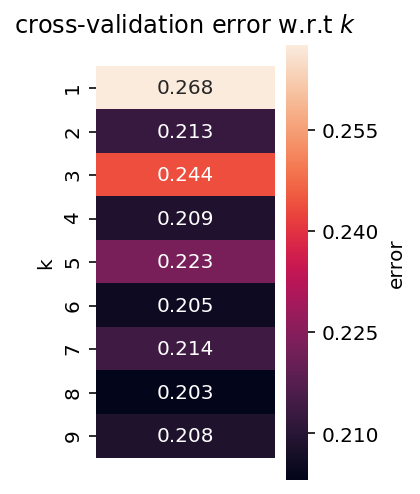

In [7]:
#MAIN ALGORITHM
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# conversion to numpy arrays
dfA['label'] = dfA.index
setA = dfA.to_numpy() # wines dataset
setB = dfB.to_numpy() # student dataset
setC = dfC.to_numpy() # census dataset

# for each dataset, d used to track numerically
d = 0
for dset in [setA, setB, setC]:
    print('Running dataset: {}'.format(d+1))
    # for each partition, c used to track numerically
    c = 0
    for p in [0.2, 0.5, 0.8]:
        print('  Running partition: {}'.format(c+1))
        errors = np.zeros((6,3)) #stores errors values used to calculate results

        # for each trial
        for s in range(3):
            #shuffling data
            np.random.seed(s)
            np.random.shuffle(dset)      
            X = dset[:, 0:-1]            
            Y = dset[:, -1]

            # Divide the data points into training set and test set.
            X_shuffled = X
            Y_shuffled = Y

            split = int(len(X)*p) # partition split
            X_train = X_shuffled[:split][:,:]          
            Y_train = Y_shuffled[:split]                 
            X_test = X_shuffled[split:][:,:]         
            Y_test = Y_shuffled[split:]
            n_train = len(X_train)
            n_test = len(X_test)
            print('    Trial {}: Training on {} out of {} datapoints'.format(s+1, n_train, len(X)))

            #KNN ALGORITHM
            # grid search for best knn
            grid_search_knn.fit(X_train, Y_train)
            
            # only showing heatmaps on dataset C's 80/20 split because the other's aren't that interesting
            if(d==2 and p==0.8):
                if(s==0): print('Knn Cross-validation heatmaps for dataset C\'s 80/20 split partitions')
                # Drawing heatmaps of cross-validation errors for knn
                cross_val_errors = 1 - grid_search_knn.cv_results_['mean_test_score'].reshape(-1,1)
                draw_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

            # Calculate the training error.
            train_error = 0 
            for(xi, yi) in zip(grid_search_knn.best_estimator_.predict(X_train), Y_train):
                train_error += np.array(xi != yi).astype(np.float32)
            train_error = 1.0 * train_error / n_train
            errors[0][s]=train_error

            # Calculate the testing error.
            test_error = 0
            for(xi, yi) in zip(grid_search_knn.best_estimator_.predict(X_test), Y_test):
                test_error += np.array(xi != yi).astype(np.float32)
            test_error = 1.0 * test_error / n_test
            errors[1][s] = test_error
            test_e_knn[c][d*3 + s] = test_error

            #DECISION TREE ALGORITHM
            # grid search for best decision tree
            grid_search_dt.fit(X_train, Y_train)

            # Calculate the training error.
            train_error = 0
            for(xi, yi) in zip(grid_search_dt.best_estimator_.predict(X_train), Y_train):
                train_error += np.array(xi != yi).astype(np.float32)
            train_error = 1.0 * train_error / n_train
            errors[2][s]=train_error

            # Calculate the testing error.
            test_error = 0
            for(xi, yi) in zip(grid_search_dt.best_estimator_.predict(X_test), Y_test):
                test_error += np.array(xi != yi).astype(np.float32)
            test_error = 1.0 * test_error / n_test
            errors[3][s]=test_error
            test_e_dt[c][d*3 + s] = test_error

            #LOGISTIC REGRESSION ALGORITHM
            classifier.fit(X_train, Y_train)

            # training error
            e_training = calc_error(X_train, Y_train, classifier)
            errors[4][s]=e_training

            # testing error
            e_testing = calc_error(X_test, Y_test, classifier)
            errors[5][s]=e_testing
            test_e_lr[c][d*3 + s] = test_error
            
            #End trial block

        # writing mean error scores and standard deviation to the dataframes
        dfs[c].iat[0,d*2]='{:.2f} +/- {:.2f}'.format(np.mean(errors[0]),np.std(errors[0]))
        dfs[c].iat[0,d*2+1]='{:.2f} +/- {:.2f}'.format(np.mean(errors[1]),np.std(errors[1]))
        dfs[c].iat[1,d*2]='{:.2f} +/- {:.2f}'.format(np.mean(errors[2]),np.std(errors[2]))
        dfs[c].iat[1,d*2+1]='{:.2f} +/- {:.2f}'.format(np.mean(errors[3]),np.std(errors[3]))
        dfs[c].iat[2,d*2]='{:.2f} +/- {:.2f}'.format(np.mean(errors[4]),np.std(errors[4]))
        dfs[c].iat[2,d*2+1]='{:.2f} +/- {:.2f}'.format(np.mean(errors[5]),np.std(errors[5]))
        
        c+=1
        #End partition block
        
    d+=1
    #End dataset block
    
for i in range(3): # calculate avg testing error across datasets
    dfs[i].iat[0,6]='{:.2f}'.format(np.mean(test_e_knn[i]))
    dfs[i].iat[1,6]='{:.2f}'.format(np.mean(test_e_dt[i]))
    dfs[i].iat[2,6]='{:.2f}'.format(np.mean(test_e_lr[i]))

### Results

In [8]:
dfs[0] # 20/80 Split Table

,A Training,A Testing,B Training,B Testing,C Training,C Testing,Avg Testing
Knn,0.13 +/- 0.11,0.33 +/- 0.04,0.05 +/- 0.04,0.13 +/- 0.01,0.19 +/- 0.01,0.21 +/- 0.00,0.22
Decision Tree,0.00 +/- 0.00,0.17 +/- 0.04,0.05 +/- 0.05,0.13 +/- 0.01,0.13 +/- 0.01,0.15 +/- 0.00,0.15
Logistic Regression,0.03 +/- 0.02,0.10 +/- 0.03,0.03 +/- 0.02,0.17 +/- 0.03,0.21 +/- 0.00,0.20 +/- 0.00,0.15


In [9]:
dfs[1] # 50/50 Split Table

,A Training,A Testing,B Training,B Testing,C Training,C Testing,Avg Testing
Knn,0.13 +/- 0.10,0.31 +/- 0.02,0.10 +/- 0.01,0.13 +/- 0.01,0.19 +/- 0.00,0.21 +/- 0.00,0.22
Decision Tree,0.00 +/- 0.00,0.06 +/- 0.01,0.10 +/- 0.01,0.13 +/- 0.01,0.13 +/- 0.00,0.15 +/- 0.00,0.11
Logistic Regression,0.02 +/- 0.01,0.05 +/- 0.02,0.09 +/- 0.01,0.14 +/- 0.01,0.20 +/- 0.00,0.20 +/- 0.00,0.11


In [10]:
dfs[2] # 80/20 Split Table

,A Training,A Testing,B Training,B Testing,C Training,C Testing,Avg Testing
Knn,0.07 +/- 0.10,0.40 +/- 0.07,0.09 +/- 0.00,0.11 +/- 0.02,0.19 +/- 0.00,0.21 +/- 0.00,0.24
Decision Tree,0.02 +/- 0.01,0.15 +/- 0.08,0.09 +/- 0.03,0.11 +/- 0.01,0.14 +/- 0.00,0.15 +/- 0.00,0.13
Logistic Regression,0.01 +/- 0.00,0.08 +/- 0.06,0.11 +/- 0.01,0.13 +/- 0.03,0.20 +/- 0.00,0.20 +/- 0.01,0.13
